In [36]:
from typing import List
from collections import Counter

In [37]:
def majority_vote(labels) -> str:
    """Исходя из того, что метки упорядочены от ближайшей до удаленной"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values() if count == winner_count])
    if num_winners == 1:
        return winner # Уникальный победитель
    else:
        return majority_vote(labels[:-1]) # Новая попытка без самой удаленной точки

In [38]:
from typing import NamedTuple

class LabeledPoint(NamedTuple):
    def knn_classify(k, labeled_points, new_point):
        # Упорядочить точки от ближайшей к дальней
        by_distance = sorted(labeled_points, key = lambda lp: distance(lp.point, new_point))
        
        # Отыскать метки для k ближайших
        k_nearest_labels = [lp.label for lp in by_distance[:k]]
        
        return majority_vote(k_nearest_labels)

Протестируем работу классификатора

In [39]:
import requests
from ucimlrepo import fetch_ucirepo 
import csv
from collections import defaultdict

In [40]:
data = fetch_ucirepo(id=53) 

In [41]:
def parse_iris_row(row) -> LabeledPoint:
    """Длина цветка, ширина цветка, длина лепестка, ширина лепестка, класс"""
    measurements = [float(value) for value in row[:-1]]
    label = row[-1].split("-")[-1]
    
    return LabeledPoint(measurements, label)

In [44]:
with open(data.data.features) as f:
    reader = csv.reader(f)
    print(reader)
    iris_data = [parse_iris_row(row) for row in reader if len(row) > 10]
    print(iris_data)
    points_by_species = defaultdict(list)
    for iris in iris_data:
        points_by_species[iris.label].append(iris.point)

TypeError: unhashable type: 'DataFrame'

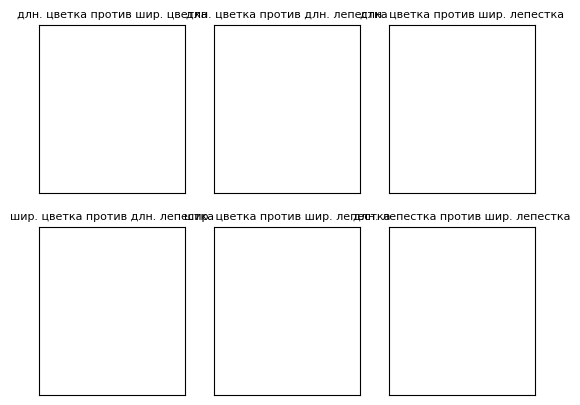

In [45]:
from matplotlib import pyplot as plt
metrics = ['длн. цветка', 'шир. цветка', 'длн. лепестка', 'шир. лепестка']
pairs = [(i, j) for i in range(4) for j in range(4) if i < j]
marks = ['+', '.', 'x']

fig, ax = plt.subplots(2, 3)

for row in range(2):
    for col in range(3):
        i, j = pairs[3 * row + col]
        ax[row][col].set_title(f"{metrics[i]} против {metrics[j]}", fontsize = 8)
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
        
        for mark, (species, points) in zip(marks, points_by_species.items()):
            xs = [point[i] for point in points]
            ys = [point[j] for point in points]
            ax[row][col].scatter(xs, ys, marker = mark, label = species)

plt.show()